In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')


In [2]:
sns.set_style({'axes.axisbelow': True, 'axes.edgecolor': '.15', 'axes.facecolor': 'white',
               'axes.grid': True, 'axes.labelcolor': '.15', 'axes.linewidth': 0.5, 
               'figure.facecolor': 'white',  'grid.color': '.15',
               'grid.linestyle': '-', 'grid.alpha': .1, 'image.cmap': 'Greys', 
               'legend.frameon': False, 'legend.numpoints': 1, 'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'round', 'axes.spines.right': False, 'axes.spines.top': False,  
               'text.color': '.15',  'xtick.top': False, 'ytick.right': False, 'xtick.color': '.15',
               'xtick.direction': 'out', 'xtick.major.size': 3, 'xtick.minor.size': 1.5,
               'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 3,'ytick.minor.size': 1.5})
sns.set_context('paper')

#http://phyletica.org/matplotlib-fonts/
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
from snapanalysis.config import OUTPUT_DIRECTORY as OUTPUT_DIRECTORY_MAIN
OUTPUT_DIRECTORY = os.path.join(OUTPUT_DIRECTORY_MAIN, 'scatterplots')
if not os.path.isdir(OUTPUT_DIRECTORY):
    os.makedirs(OUTPUT_DIRECTORY)

In [4]:
from snapanalysis.models.enrichment.generate import OUTPUT_FILE as ENRICHMENT_FILE
from snapanalysis.models.enrichment.generate import MATRIX_COLUMN_FORWARD, MATRIX_COLUMN_REVERSE
MATRIX_COLUMN_FORWARD

'Ratio H/L normalized (log2) (adjusted, imputed, forward)'

In [5]:
with pd.HDFStore(ENRICHMENT_FILE, 'r') as store:
    data = store['enrichment_data']

In [6]:
from snapanalysis.external.complexes.curated import OUTPUT_FILE as COMPLEXES_FILE

with pd.HDFStore(COMPLEXES_FILE, 'r') as store:
    curated_complexes = store['curated_complexes']

In [7]:
curated_complexes.head()

,Complex,Gene label,Member identifier,Source
6,40S Ribosomal subunit,FAU,FAU,"uniprot_search:""40S Ribosomal"""
7,40S Ribosomal subunit,RPS10/RPS10-NUDT3,RPS10,"uniprot_search:""40S Ribosomal"""
8,40S Ribosomal subunit,RPS11,RPS11,"uniprot_search:""40S Ribosomal"""
9,40S Ribosomal subunit,RPS12,RPS12,"uniprot_search:""40S Ribosomal"""
10,40S Ribosomal subunit,RPS13,RPS13,"uniprot_search:""40S Ribosomal"""


In [8]:
COLUMN_X = MATRIX_COLUMN_FORWARD
COLUMN_Y = MATRIX_COLUMN_REVERSE


In [9]:
WIDTH = HEIGHT =  2.6 # in

In [10]:
import parameters

import importlib
importlib.reload(parameters)

<module 'parameters' from '/notebooks/scatterplots/parameters.py'>

In [11]:
COLOUR_BACKGROUND = parameters.COLOUR_BACKGROUND

In [12]:
import matplotlib.ticker as ticker

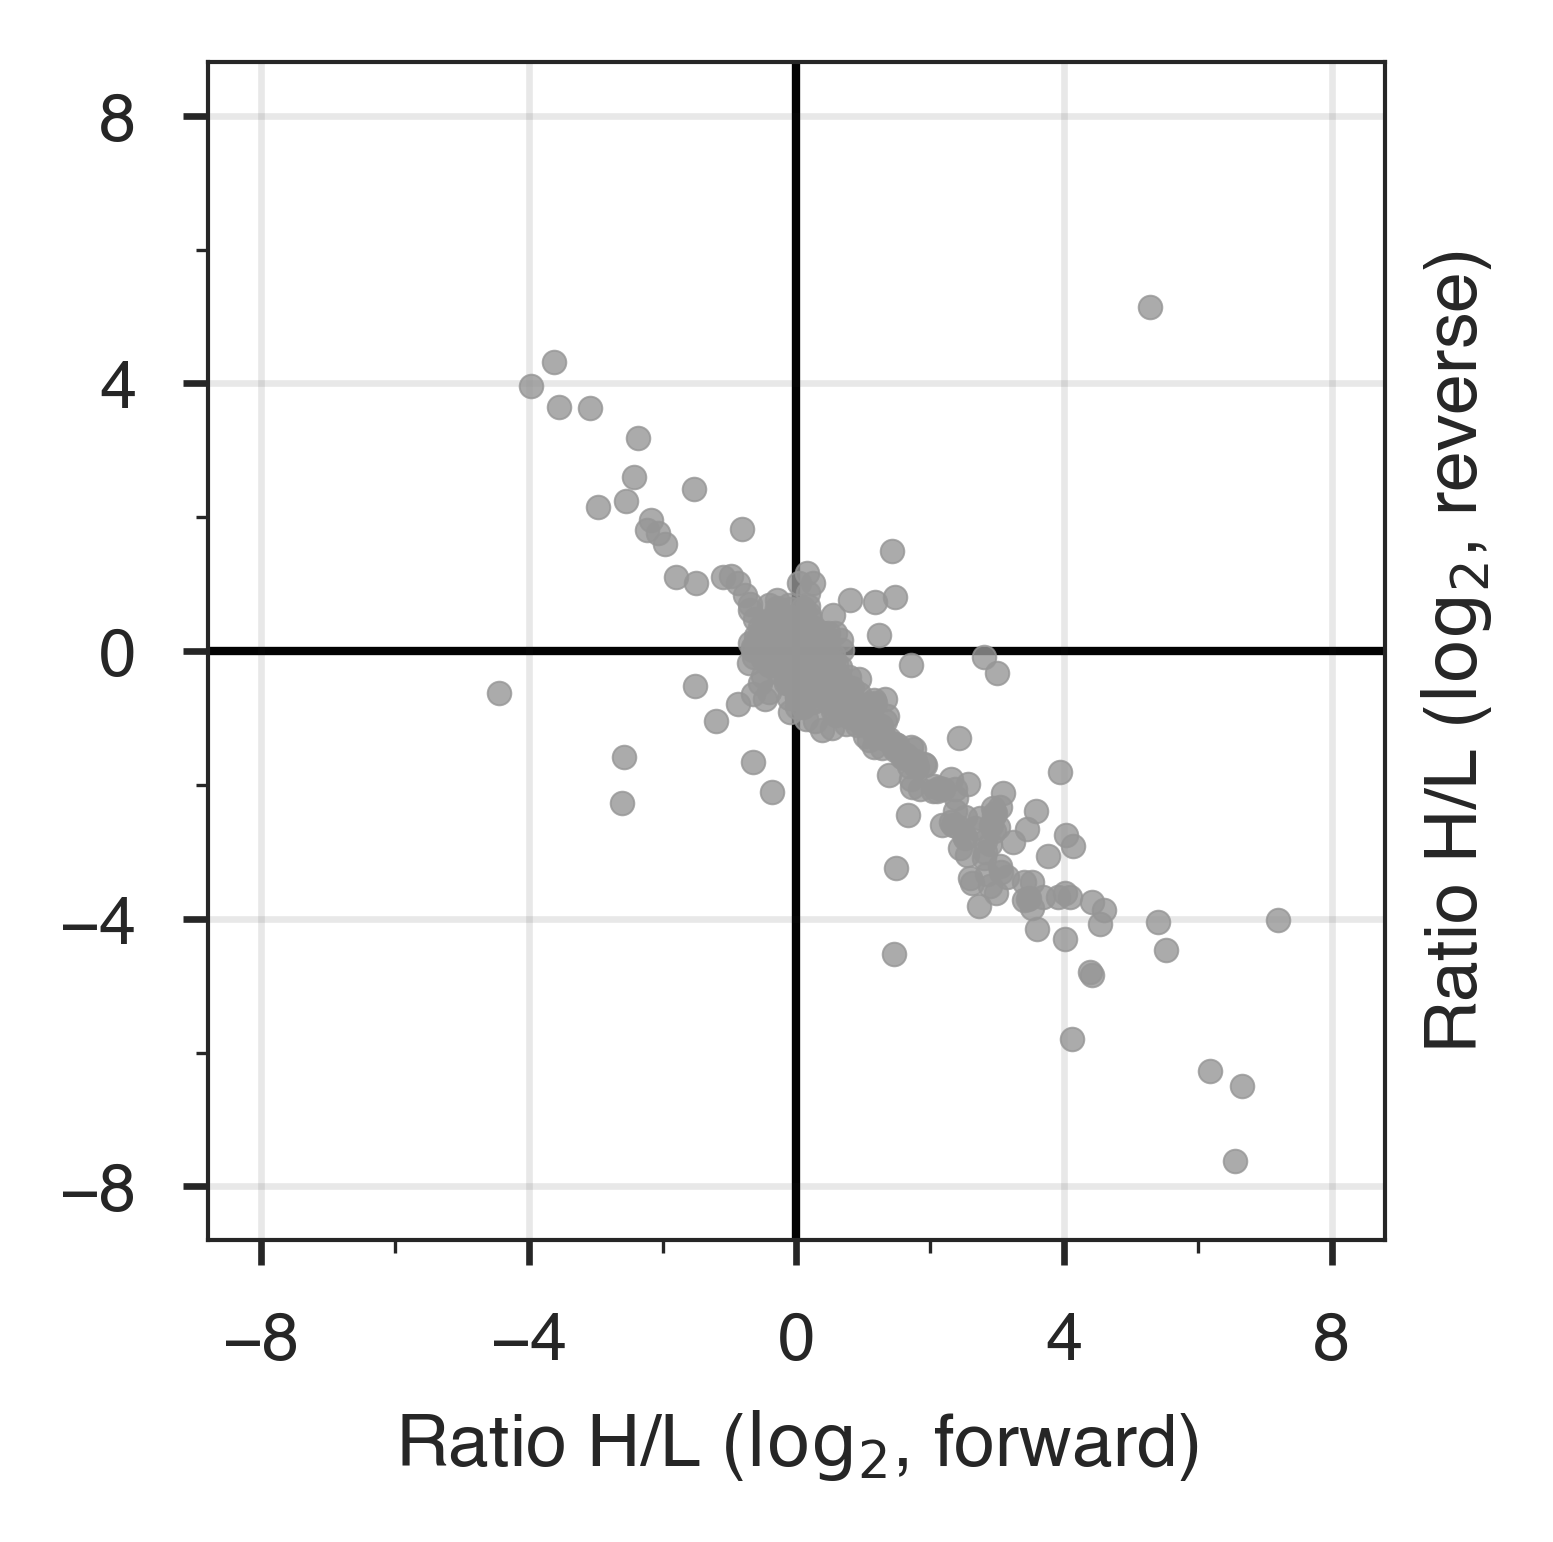

In [13]:
# Exemplary pull-down no highlighting

pulldown = 'H41'

subdata = data.loc(axis=0)[:, pulldown].dropna(subset=[COLUMN_X, COLUMN_Y])
subdata = subdata[subdata['Imputation type'].isnull()]

subdata_background = subdata
scatter_kws = dict(s=8)

fig = plt.figure(figsize=(WIDTH, HEIGHT), dpi=300)
ax = plt.gca()
ax.axhline(0, color='k', linestyle='-', linewidth=1.0, zorder=0)
ax.axvline(0, color='k', linestyle='-', linewidth=1.0, zorder=0)

ax.scatter(subdata_background[COLUMN_X], subdata_background[COLUMN_Y], 
           rasterized=True, color=COLOUR_BACKGROUND, alpha=.8,
           zorder=1, **scatter_kws)


xlim = ax.get_xlim()
ylim = ax.get_ylim()


absmax = parameters.LIMITS_INTEGER * 1.1


ax.set_ylim(-absmax, absmax)
ax.set_xlim(-absmax, absmax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(parameters.MAJOR_TICKS))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(parameters.MINOR_TICKS))
ax.yaxis.set_major_locator(ticker.MultipleLocator(parameters.MAJOR_TICKS))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(parameters.MINOR_TICKS))
ax.yaxis.set_label_position("right")

ax.grid(True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.set_aspect('equal')

ax.set_xlabel('Ratio H/L ($\log_2$, forward)')
ax.set_ylabel('Ratio H/L ($\log_2$, reverse)')

plt.savefig(os.path.join(OUTPUT_DIRECTORY, f'scatter-{pulldown}.pdf'), bbox_inches='tight')

In [14]:
from matplotlib.colors import Normalize
from adjustText import adjust_text


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


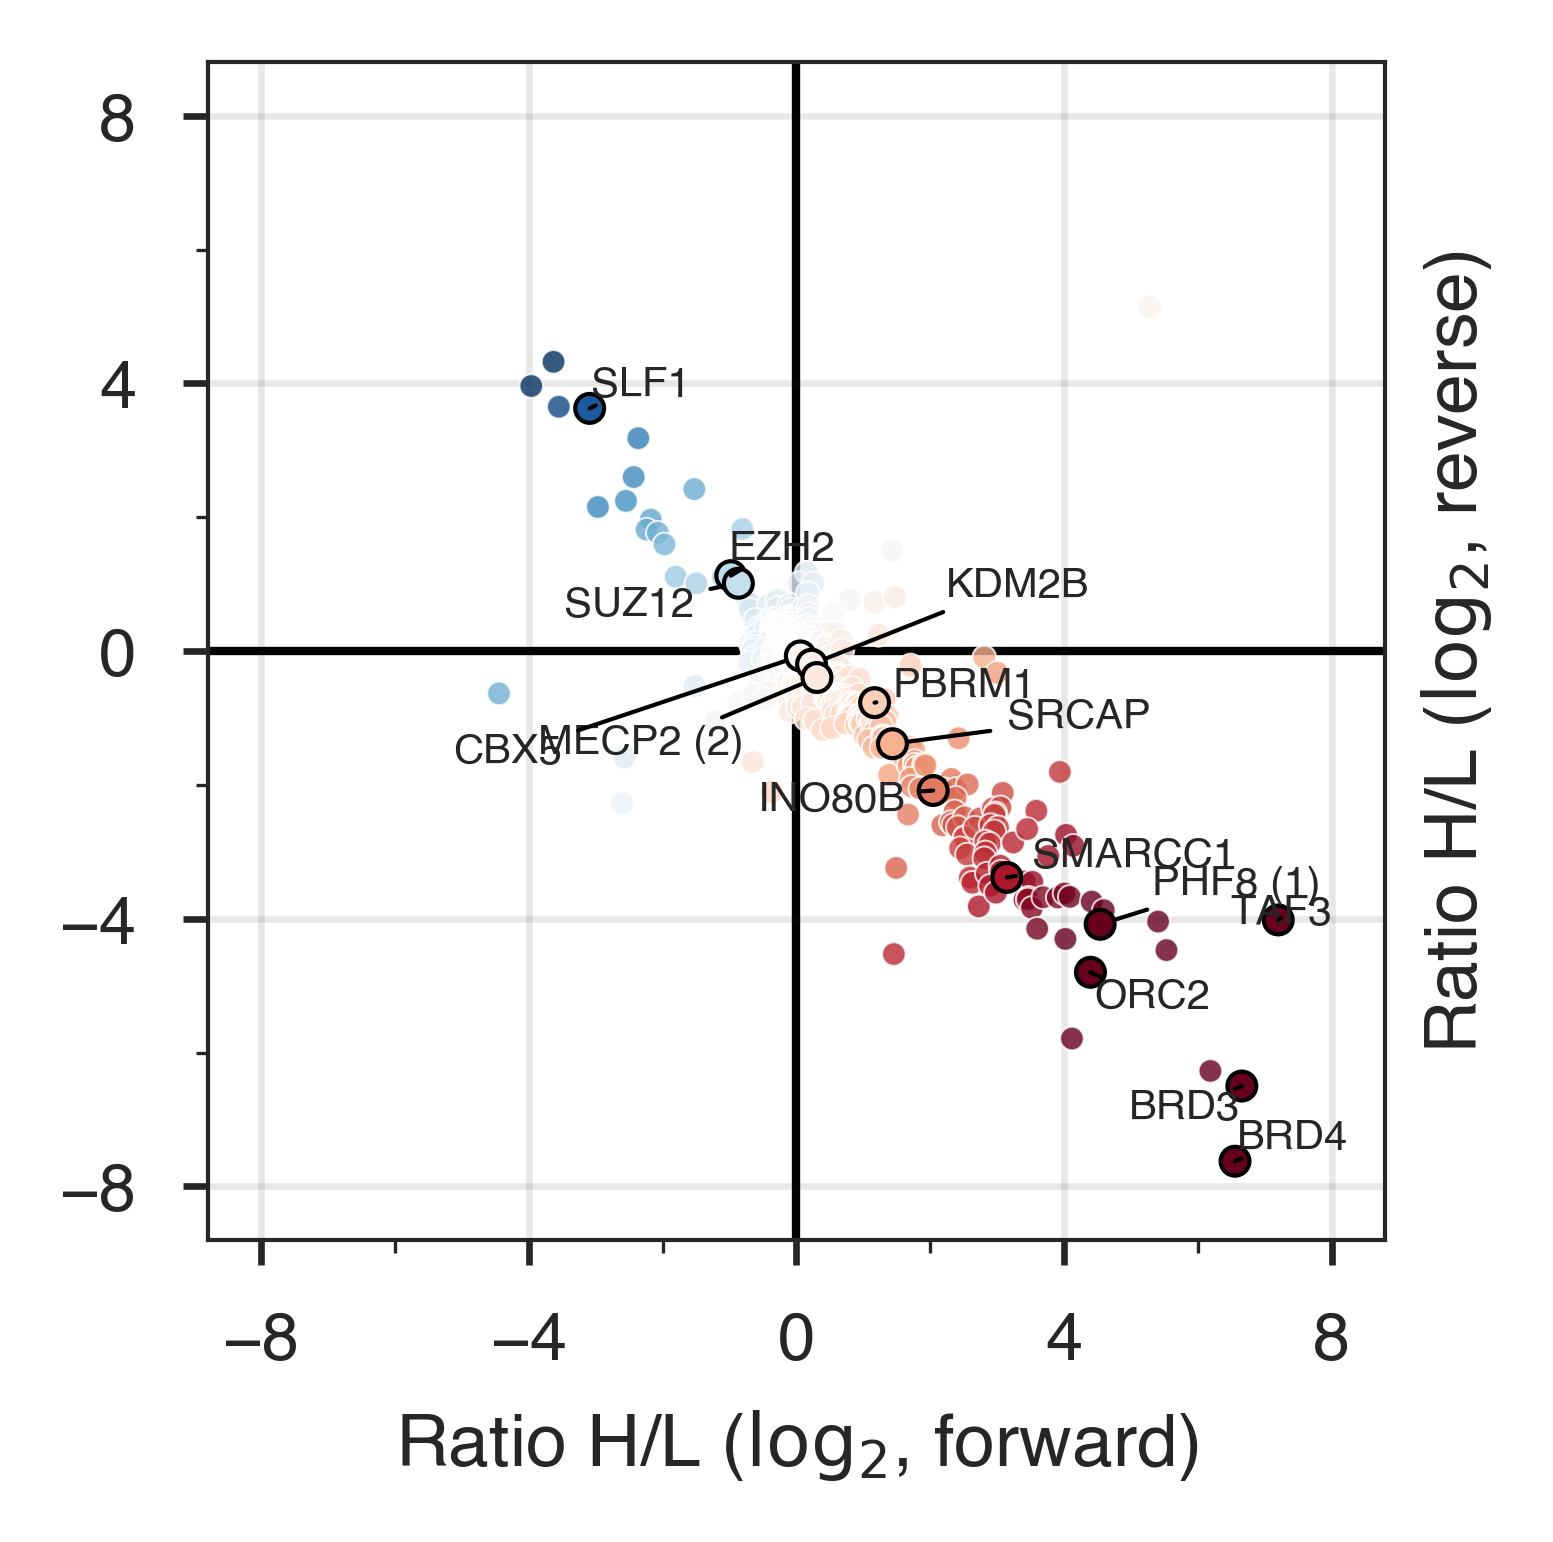

In [15]:
# Exemplary pull-down - alternative plot

highlights = [
    'KDM2B',
    'MECP2 (2)',
    'ORC2',
    'SLF1',
    'UHRF1',
    'CBX5',
    'EZH2',
    'SUZ12',
    'SMARCC1',
    'PBRM1',
    'PHF8 (1)',
    'TAF3',
    'BRD4',
    'BRD3',
    'INO80B',
    'SRCAP'
]
pulldown = 'H41'

norm = Normalize(-4, 4)

subdata = data.loc(axis=0)[:, pulldown].dropna(subset=[COLUMN_X, COLUMN_Y])
subdata = subdata[subdata['Imputation type'].isnull()]
subdata = subdata.copy()

subdata['c'] = 0.5 * (subdata[COLUMN_X] + (-subdata[COLUMN_Y]))

subdata_background = subdata.loc[subdata.index.difference(highlights)].sort_values(by='c')
subdata_foreground = subdata.loc[highlights].sort_values(by='c')

fig = plt.figure(figsize=(WIDTH, HEIGHT), dpi=300)
ax = plt.gca()
ax.axhline(0, color='k', linestyle='-', linewidth=1.0, zorder=0)
ax.axvline(0, color='k', linestyle='-', linewidth=1.0, zorder=0)

ax.scatter(subdata_background[COLUMN_X], subdata_background[COLUMN_Y], 
           rasterized=True,
           c=subdata_background['c'],
           cmap='RdBu_r',
           norm=norm,
           alpha=.8,
           edgecolor='white',
           zorder=1, s=8)

ax.scatter(subdata_foreground[COLUMN_X], subdata_foreground[COLUMN_Y], 
           rasterized=False,
           c=subdata_foreground['c'],
           cmap='RdBu_r',
           norm=norm,
#            alpha=.8,
           edgecolor='black',
           linewidth=0.5,
           zorder=2, s=12)

texts = []
for ix, row in subdata_foreground.iterrows():
    texts.append(ax.text(row[COLUMN_X], row[COLUMN_Y], ix[0], fontsize=5))


xlim = ax.get_xlim()
ylim = ax.get_ylim()

adjust_text(texts, subdata[COLUMN_X], subdata[COLUMN_Y],
            force_points=(0.2, 0.2),
            force_text=(0.4, 0.4),
            arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5))

absmax = parameters.LIMITS_INTEGER * 1.1


ax.set_ylim(-absmax, absmax)
ax.set_xlim(-absmax, absmax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(parameters.MAJOR_TICKS))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(parameters.MINOR_TICKS))
ax.yaxis.set_major_locator(ticker.MultipleLocator(parameters.MAJOR_TICKS))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(parameters.MINOR_TICKS))
ax.yaxis.set_label_position("right")

ax.grid(True)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.set_aspect('equal')

ax.set_xlabel('Ratio H/L ($\log_2$, forward)')
ax.set_ylabel('Ratio H/L ($\log_2$, reverse)')


plt.savefig(os.path.join(OUTPUT_DIRECTORY, f'scatter-{pulldown}-RdBu_r.pdf'), bbox_inches='tight')

In [16]:
#5F4690,#1D6996,#38A6A5,#0F8554,#73AF48,#EDAD08,#E17C05,#CC503E,#94346E,#6F4070,#994E95,#666666
#7F3C8D,#11A579,#3969AC,#F2B701,#E73F74,#80BA5A,#E68310,#008695,#CF1C90,#f97b72,#4b4b8f,#A5AA99

In [17]:
HIGHLIGHTS = pd.Series(parameters.HIGHLIGHTS, name='color')

More specific pull-downs with Highlights

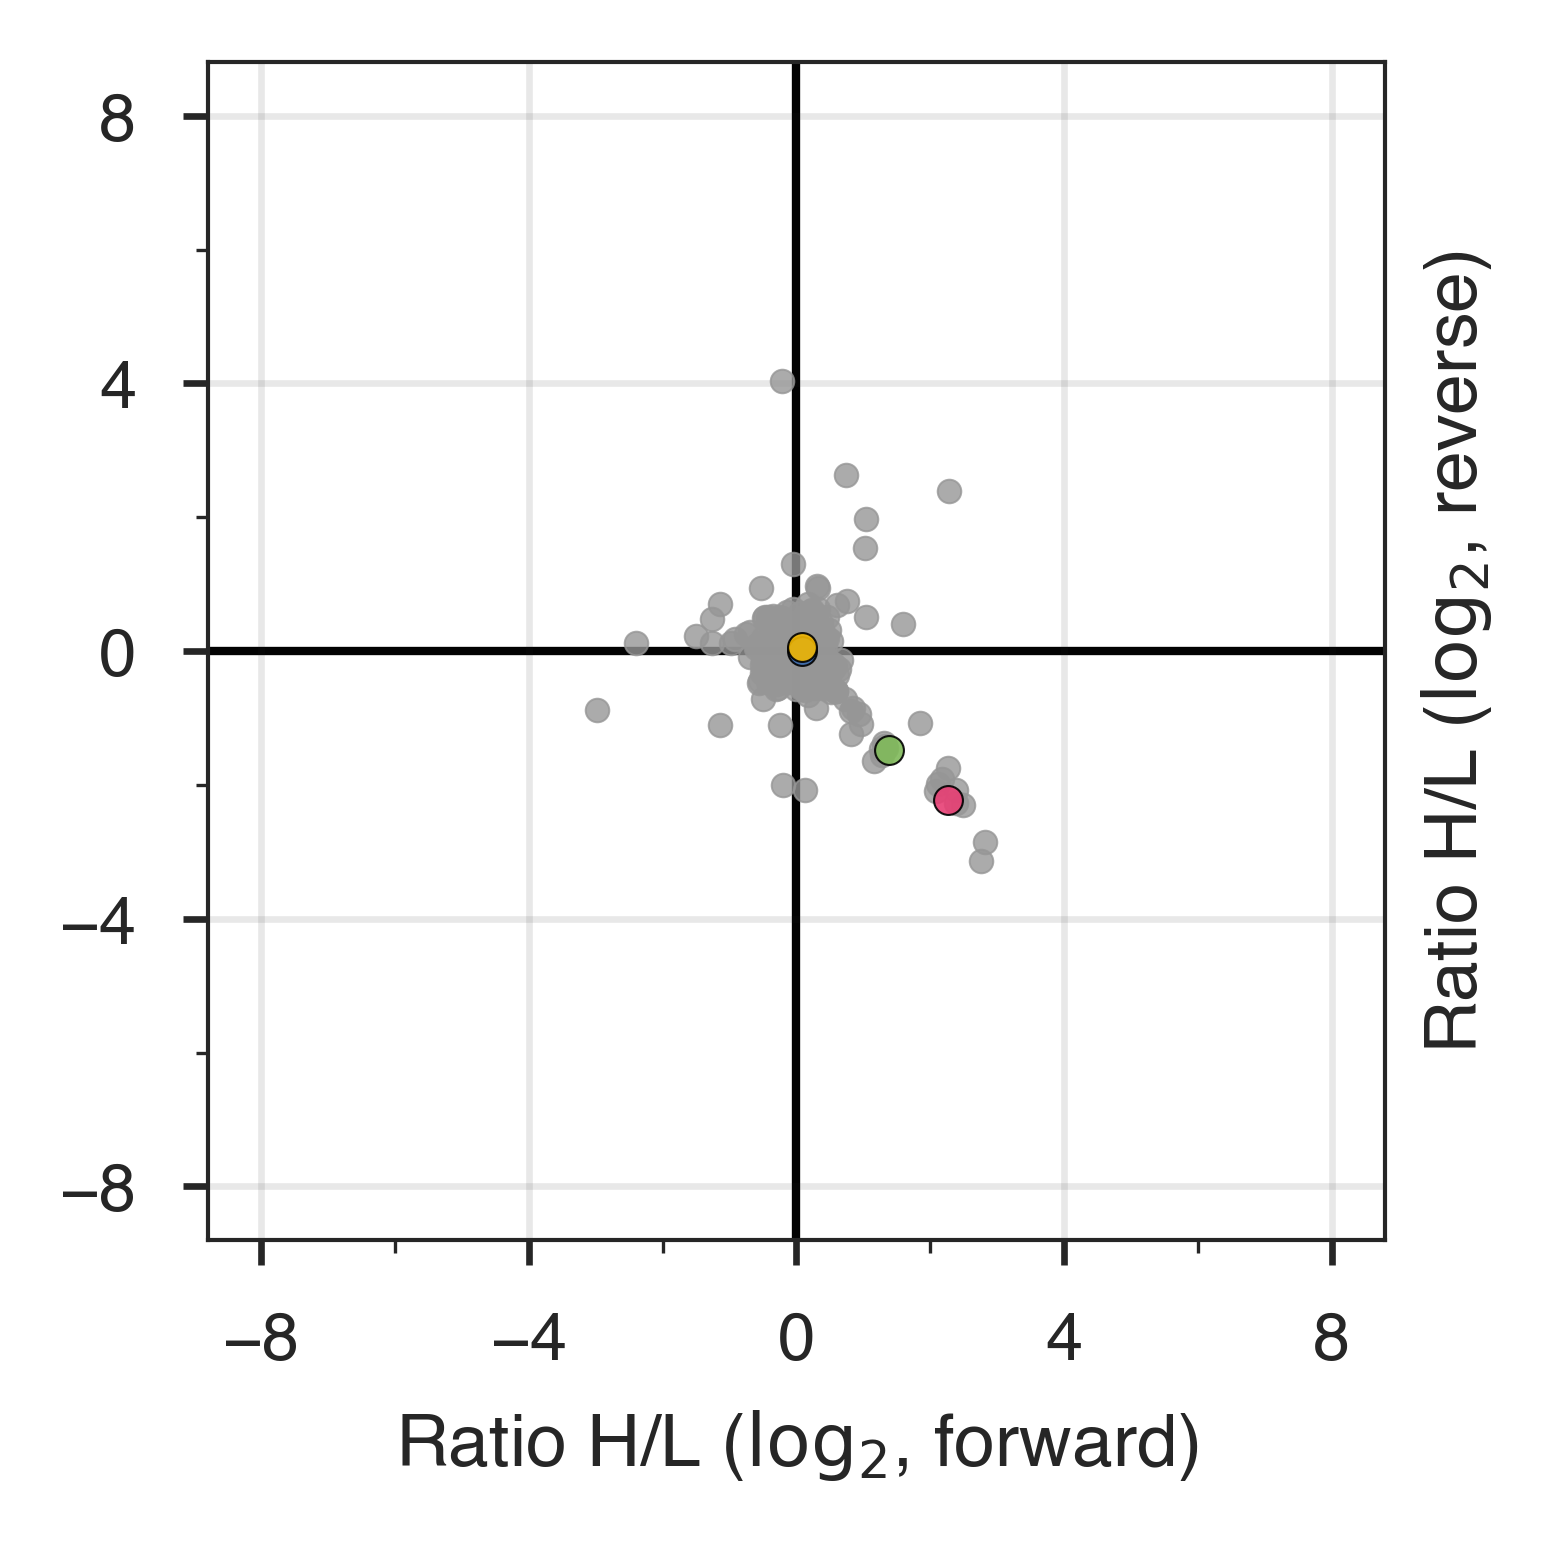

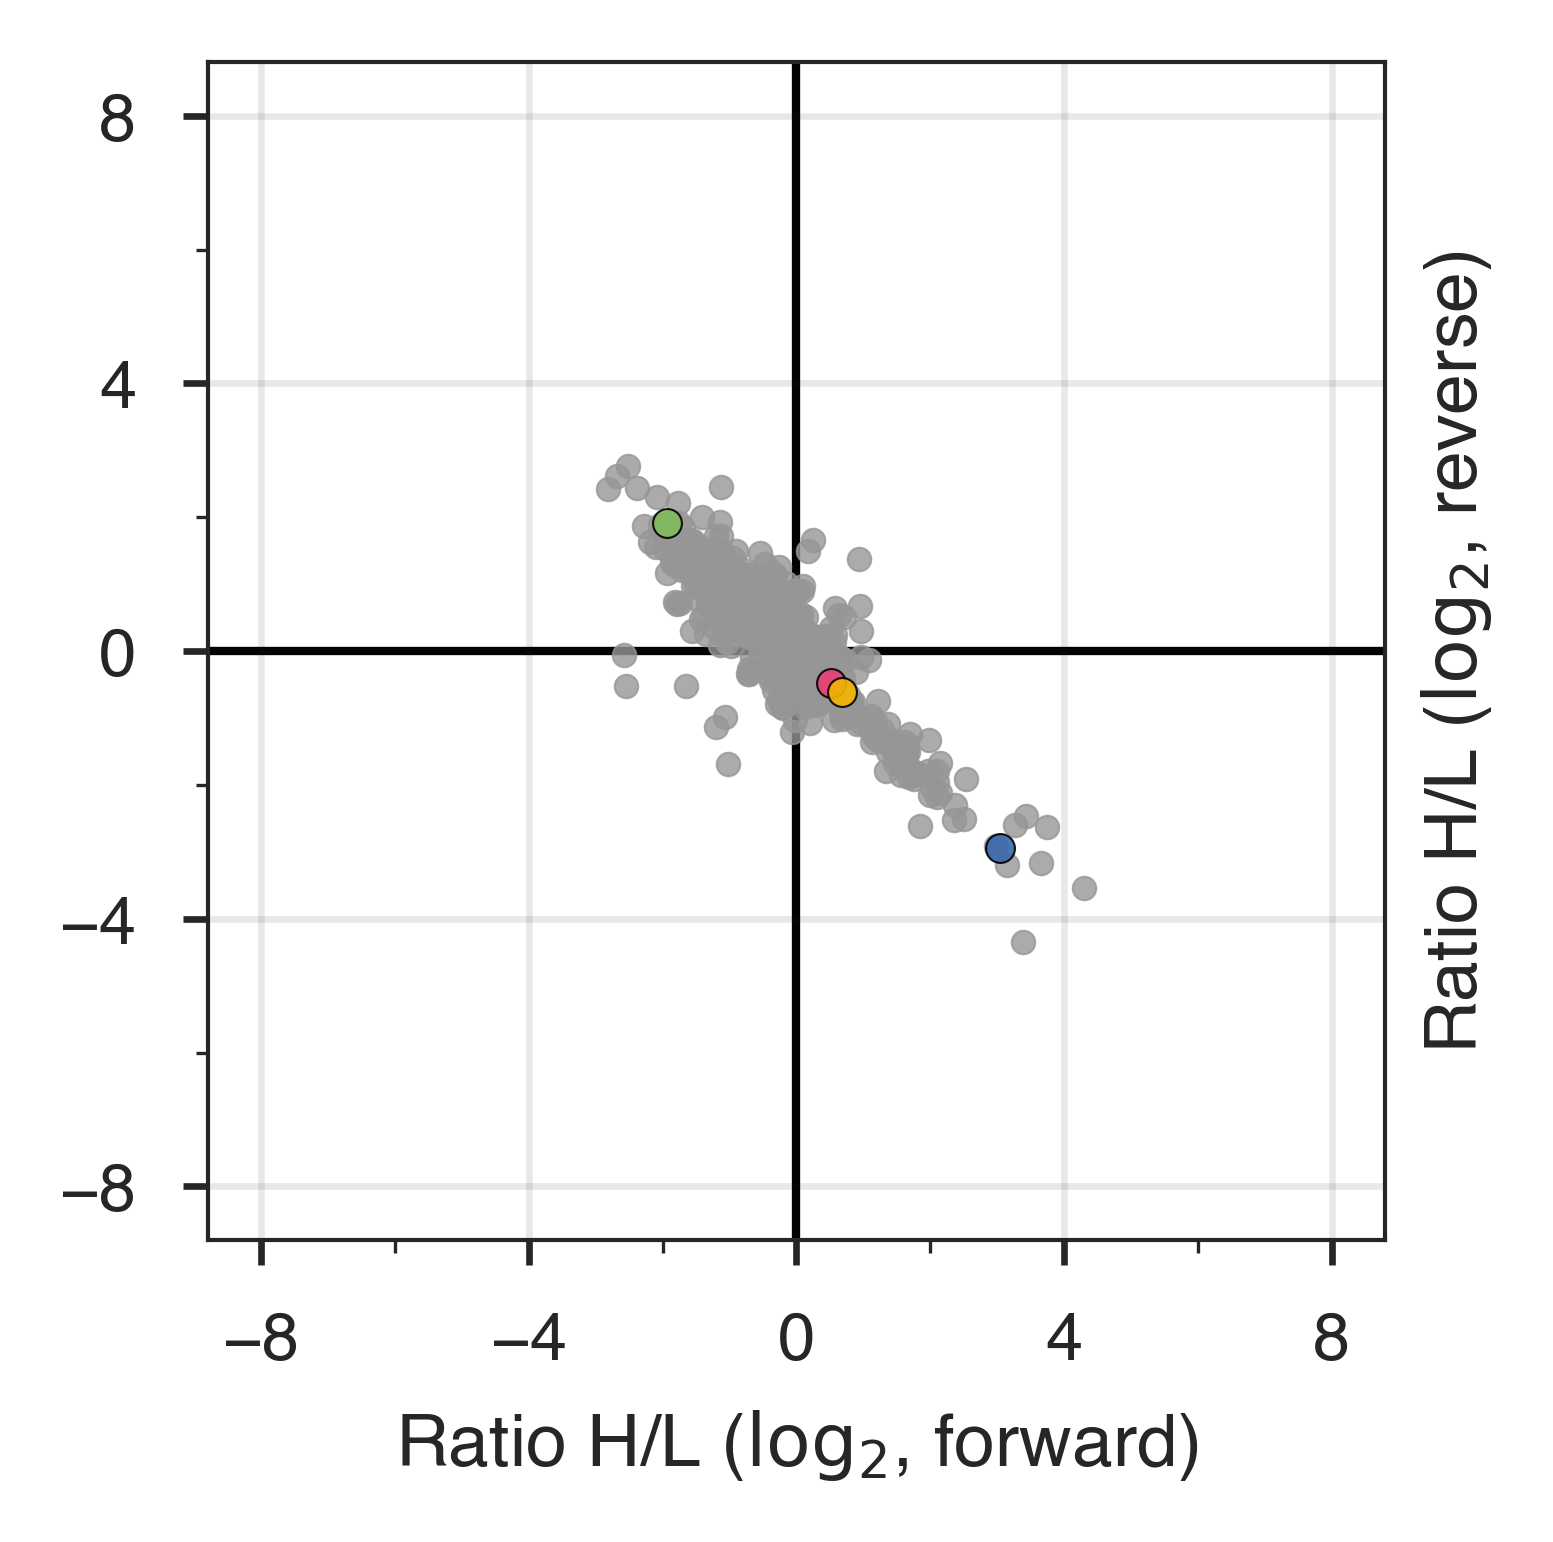

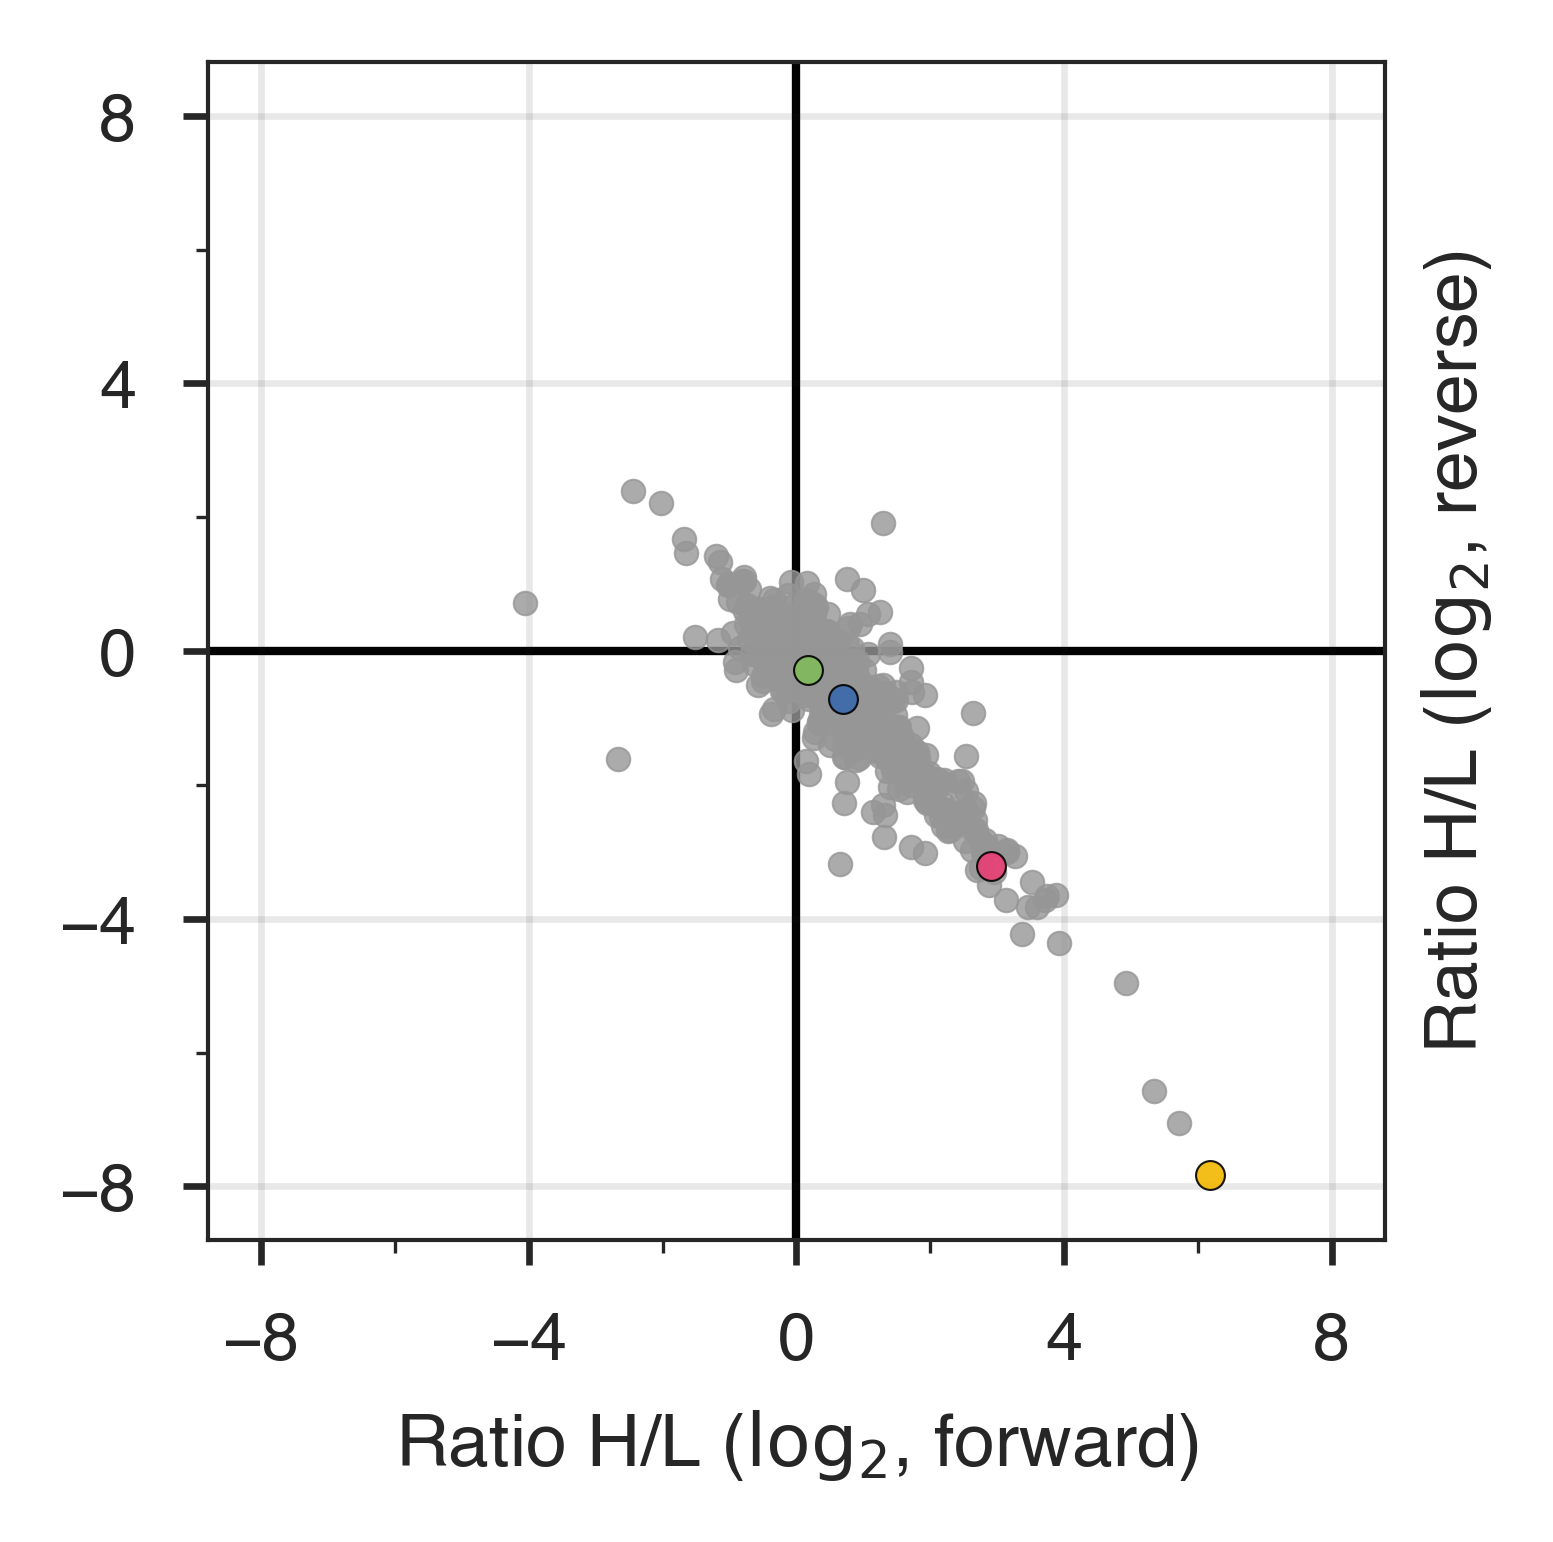

In [18]:
for pulldown in parameters.PDS_TO_HIGHLIGHT:

    subdata_with_imputed = data.loc(axis=0)[:, pulldown].dropna(subset=[COLUMN_X, COLUMN_Y])
    subdata = subdata_with_imputed[subdata_with_imputed['Imputation type'].isnull()]
    subdata = subdata.join(HIGHLIGHTS, on='Gene label')

    subdata_background = subdata[subdata['color'].isnull()]

    scatter_kws = dict()

    fig = plt.figure(figsize=(WIDTH, HEIGHT), dpi=300)
    ax = plt.gca()
    ax.axhline(0, color='k', linestyle='-', linewidth=1.0, zorder=0)
    ax.axvline(0, color='k', linestyle='-', linewidth=1.0, zorder=0)

    size_highlighted=12
    size_other=8

    ax.scatter(subdata_background[COLUMN_X], subdata_background[COLUMN_Y], 
               rasterized=True, color=COLOUR_BACKGROUND, alpha=.8, s=size_other,
               zorder=1, **scatter_kws)

    seen_colors = set([x[0] for x in subdata[~subdata['color'].isnull()].index])

    unseen_colors = set(HIGHLIGHTS.index) - seen_colors
    for unseen_protein in unseen_colors:
        color = HIGHLIGHTS[unseen_protein]
        ax.scatter(subdata_with_imputed.loc[(unseen_protein, pulldown), COLUMN_X], subdata_with_imputed.loc[(unseen_protein, pulldown), COLUMN_Y], 
                   linewidth=.25, edgecolor='black', linestyle='-', s=size_highlighted,
               color=color, alpha=.9,
               zorder=1, **scatter_kws)

    for color, colored_subdata in subdata[~subdata['color'].isnull()].groupby('color'):
        ax.scatter(colored_subdata[COLUMN_X], colored_subdata[COLUMN_Y], s=size_highlighted,
                   linewidth=.25, edgecolor='black',
               color=color, alpha=.9,
               zorder=1, **scatter_kws)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xlim_absmax = np.max(np.abs(xlim))
    ylim_absmax = np.max(np.abs(ylim))

    xylim_absmax = parameters.LIMITS_INTEGER * 1.1

    ax.set_xlim(-xylim_absmax, xylim_absmax)
    ax.set_ylim(-xylim_absmax, xylim_absmax)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(parameters.MAJOR_TICKS))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(parameters.MINOR_TICKS))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(parameters.MAJOR_TICKS))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(parameters.MINOR_TICKS))
    ax.yaxis.set_label_position("right")

    ax.grid(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_aspect('equal')

    ax.set_xlabel('Ratio H/L ($\log_2$, forward)')
    ax.set_ylabel('Ratio H/L ($\log_2$, reverse)')

    plt.savefig(os.path.join(OUTPUT_DIRECTORY, f'scatter-{pulldown}.pdf'), bbox_inches='tight')